In [ ]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import sympy
from radius_of_convergence import *

In [17]:
def func1(x):
   return jnp.exp(x) - 1
func1_expr = sympy.exp(x) - 1
func1_solutions = sympy.solve(func1_expr, x)
func1_solutions = [sol.evalf() for sol in func1_solutions if sol.is_real]
func1_solutions.sort()

In [24]:
l = radius_of_convergence_bisection(func1, func1_solutions, 100., 100)

In [34]:
all_none = all(element is None for element in l)
print(all_none)


False


AttributeError: module 'numpy' has no attribute 'isnone'

In [61]:
def plot_convergence(func, solutions, window=2):
    bounds = radius_of_convergence_bisection(func, solutions)
        
    if all(element is None for element in bounds):
        print(f"Warning: No bounds found. Defaulting to plotting around solutions.")
        fig, ax = plt.subplots(len(solutions), 1, figsize=(10, 6 * len(solutions)))
        for i, sol in enumerate(solutions):
            sol = float(sol)
            # Generate values around the bound
            values = np.linspace(sol - window, sol + window, 2001)
            results = [(val, converges(func, sol, np.round(val, 2))) for val in values]

            # Separate values based on convergence
            converging_vals = [val for val, converges in results if converges]
            non_converging_vals = [val for val, converges in results if not converges]

            # Plot the function
            ax[i].plot(values, [func(val) for val in values], label=f'func(x) around solution {sol}')

            # Plot converging points
            ax[i].scatter(converging_vals, [func(val) for val in converging_vals], color='green', label='Converges')

            # Plot non-converging points
            ax[i].scatter(non_converging_vals, [func(val) for val in non_converging_vals], color='red', label='Does not converge')
    else:
        fig, ax = plt.subplots(len(bounds), 2, figsize=(20, 6 * len(bounds)))
        if len(bounds) == 1:
            ax = np.expand_dims(ax, 0)
        for i, b in enumerate(bounds):
            for j, bound in enumerate(b):
                if bound is not None:
                    # Generate values around the upper bound
                    values = np.linspace(bound - window, bound + window, 201)
                    results = [(val, converges(func, bound, np.round(val, 2))) for val in values]

                    # Separate values based on convergence
                    converging_vals = [val for val, converges in results if converges]
                    non_converging_vals = [val for val, converges in results if not converges]

                    # Plot the function around the upper bound
                    ax[i,j].plot(values, [func(val) for val in values], label=f'func(x) around upper bound {bound}')

                    # Plot converging points around the upper bound
                    ax[i,j].scatter(converging_vals, [func(val) for val in converging_vals], color='green', label='Converges')

                    # Plot non-converging points around the upper bound
                    ax[i,j].scatter(non_converging_vals, [func(val) for val in non_converging_vals], color='red', label='Does not converge')
        fig.show()

/var/folders/m7/6v1zwk1505d2ph7h2jch6t340000gn/T/ipykernel_26297/176806672.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


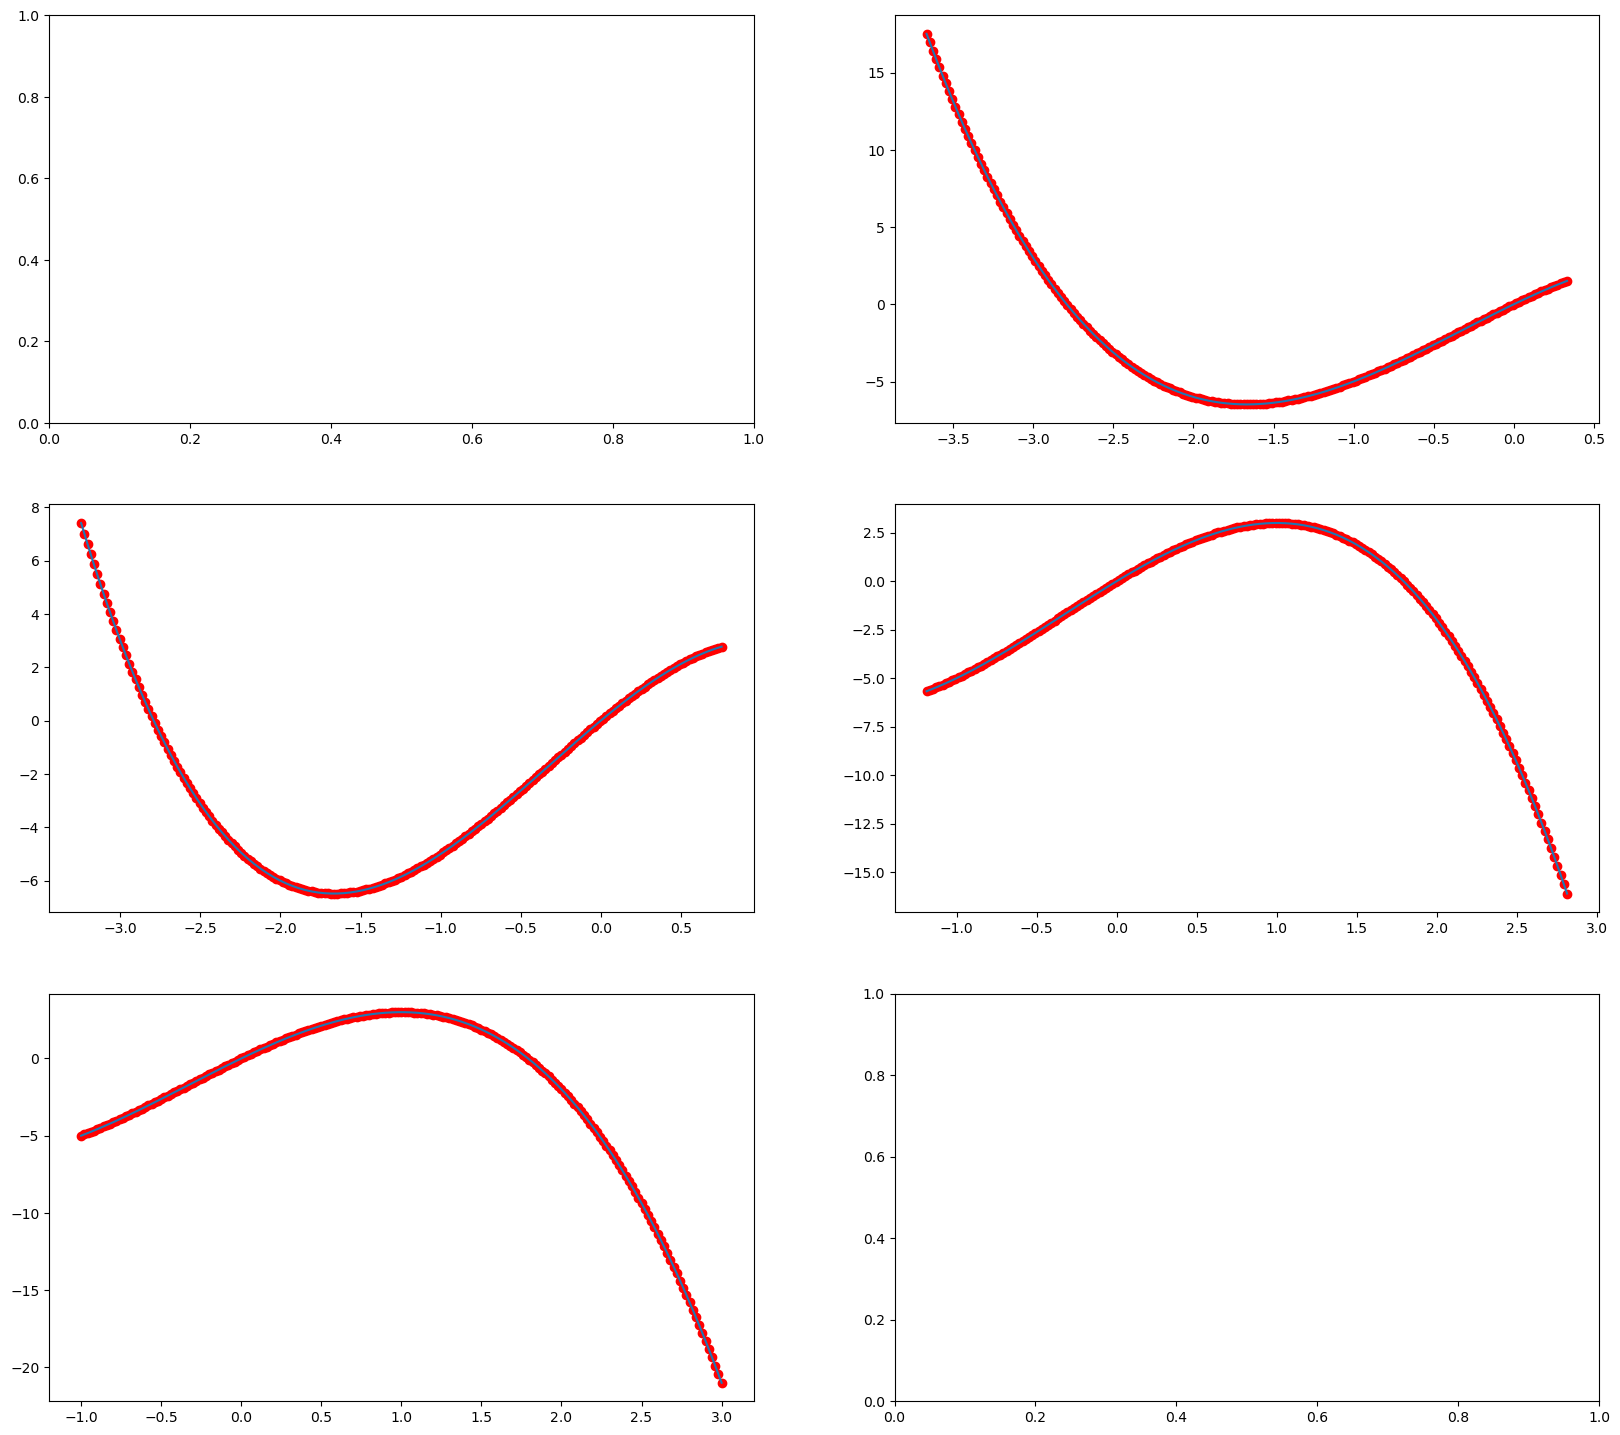

In [62]:
plot_convergence(func5, func5_solutions)

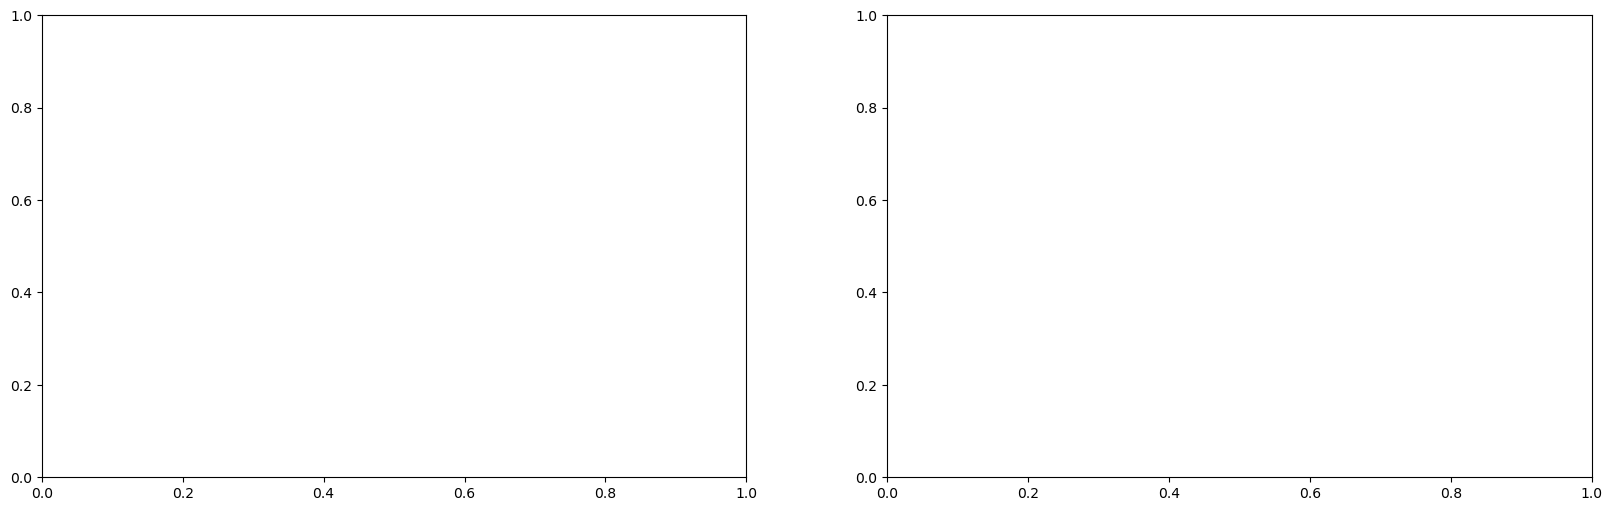

In [55]:
fig, ax = plt.subplots(len(l), 2, figsize=(20, 6 * len(l)))


array([<Axes: >, <Axes: >], dtype=object)

In [59]:
def func1(x):
   return jnp.exp(x) - 1
func1_expr = sympy.exp(x) - 1
func1_solutions = sympy.solve(func1_expr, x)
func1_solutions = [sol.evalf() for sol in func1_solutions if sol.is_real]
func1_solutions.sort()

def func2(x):
   return jnp.square(x) - (2*x) - 4
func2_expr = x**2 - 2*x - 4
func2_solutions = sympy.solve(func2_expr, x)
func2_solutions = [sol.evalf() for sol in func2_solutions if sol.is_real]
func2_solutions.sort()

def func3(x):
   return -jnp.square(x) - (2*x)
func3_expr = -x**2 - 2*x
func3_solutions = sympy.solve(func3_expr, x)
func3_solutions = [sol.evalf() for sol in func3_solutions if sol.is_real]
func3_solutions.sort()

def func4(x):
   return jnp.power(x, 3) + 2 * jnp.power(x, 2) + (4*x) + 3
func4_expr = x**3 + 2*x**2 + 4*x + 3
func4_solutions = sympy.solve(func4_expr, x)
func4_solutions = [sol.evalf() for sol in func4_solutions if sol.is_real]
func4_solutions.sort()

def func5(x):
   return -jnp.power(x, 3) - jnp.power(x, 2) +  (5 * x)
func5_expr = -x**3 - x**2 + 5*x
func5_solutions = sympy.solve(func5_expr, x)
func5_solutions = [sol.evalf() for sol in func5_solutions if sol.is_real]
func5_solutions.sort()

def func6(x):
   return jnp.cos(x)
func6_expr = sympy.cos(x)
func6_solutions = sympy.solve(func6_expr, x)
func6_solutions = [sol.evalf() for sol in func6_solutions if sol.is_real]
func6_solutions.sort()

def func7(x):
   return -4 * jnp.sin(x) + jnp.cos(x)
func7_expr = -4 * sympy.sin(x) + sympy.cos(x)
func7_solutions = sympy.solve(func7_expr, x)
func7_solutions = [sol.evalf() for sol in func7_solutions if sol.is_real]
func7_solutions.sort()

def func8(x):
   return (2*x) + 1
func8_expr = 2*x + 1
func8_solutions = sympy.solve(func8_expr, x)
func8_solutions = [sol.evalf() for sol in func8_solutions if sol.is_real]
func8_solutions.sort()

functions = [func1, func2, func3, func4, func5, func6, func7, func8]
solutions = [func1_solutions, func2_solutions, func3_solutions, func4_solutions, func5_solutions, func6_solutions, func7_solutions, func8_solutions]

In [4]:
func = generate_random_function(max_degree=2)
analyze_function(*func)


Generated function: 6.13576996827608*x - 6.25777540536906
Real roots: [1.01988429125013]
Radius of convergence data: [(None, None)]


(6.13576996827608*x - 6.25777540536906, [1.01988429125013])

In [3]:
for i in range(10):
    print(f"\n=== Analysis for function {i+1} ===")
    analyze_function(*generate_random_function(max_degree=2))


=== Analysis for function 1 ===
Generated function: 8.0906813071799*x - 3.37006471248837
Real roots: [0.416536578878429]
Radius of convergence data: [(None, None)]

=== Analysis for function 2 ===
Generated function: 1.91071395456043*x**2 + 1.74460940276284*x + 4.87911785942862
Real roots: []
No real roots found, skipping convergence analysis.

=== Analysis for function 3 ===
Generated function: -0.910774307671016*x**2 - 8.79305049443403*x + 2.45538802373916
Real roots: [-9.92607914107842, 0.271601165168938]
Radius of convergence data: [(None, -4.82724), (-4.82724, None)]

=== Analysis for function 4 ===
Generated function: 4.69363518079637*x + 1.19648593667385
Real roots: [-0.254916688363249]
Radius of convergence data: [(None, None)]

=== Analysis for function 5 ===
Generated function: 7.8645342266873*x**2 + 11.6008512428247*x - 4.57818010495472
Real roots: [-1.79871995485354, 0.323635619476289]
Radius of convergence data: [(None, -0.73754), (-0.73754, None)]

=== Analysis for funct

The function is really slow, so I want to @jit it for **much faster processing**, but I need to overhaul everything using jax operations to do so. Also was having some issues with using trig functions. 

I also want to clean up the presentation of this data further, maybe throw it in a table instead. 

Additionally, I was having issues implementing sin and cos as bases, so I'm gonna come back around to it soon. 